In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import * 
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn #posłuży do wizualizacji macierzy pomyłek

zbior danych o awaryjności dysków - plik `data/disk_failures.csv`

cel: zbudowanie modelu oceniającego na podstawie metryk S.M.A.R.T., 
     czy dany dysk ulegnie w najbliższym czasie awarii
        
S.M.A.R.T.: • liczba cykli start/stop • temperatura dysku • częstotliwość błędów podczas odczytu
• liczba realokowanych sektorów • liczba prób uruchomienia osi dysku


In [2]:
df = pd.read_csv('data/disk_failures.csv', true_values=['Yes.', 'True.'], false_values=['No.','False.'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CapacityBytes  8202 non-null   float64 
 1   SMART_1_Raw    8193 non-null   float64 
 2   SMART_2_Raw    8194 non-null   float64 
 3   SMART_3_Raw    8194 non-null   float64 
 4   SMART_4_Raw    8194 non-null   float64 
 5   SMART_5_Raw    8194 non-null   float64 
 6   DiskFailure    8202 non-null   category
dtypes: category(1), float64(6)
memory usage: 392.7 KB


In [4]:
to_drop = ['Model', 'SerialNumber', 'Date']
df.drop(to_drop, axis=1, inplace=True)

In [5]:
df.DiskFailure = df.DiskFailure.astype('category')
df.DiskFailure

0       Yes
1       Yes
2        No
3       Yes
4       Yes
       ... 
8197     No
8198    Yes
8199    Yes
8200    Yes
8201    Yes
Name: DiskFailure, Length: 8202, dtype: category
Categories (2, object): ['No', 'Yes']

In [7]:
df

,CapacityBytes,SMART_1_Raw,SMART_2_Raw,SMART_3_Raw,SMART_4_Raw,SMART_5_Raw,DiskFailure
0,2.000000e+12,0.0,1.0,39063.0,31.0,0.0,Yes
1,2.000000e+12,0.0,1.0,30730.0,32.0,0.0,Yes
2,4.000000e+12,0.0,0.0,1806.0,24.0,0.0,No
3,1.500000e+12,104152028.0,102.0,36008.0,26.0,0.0,Yes
4,1.500000e+12,133405108.0,1242.0,37515.0,21.0,0.0,Yes
...,...,...,...,...,...,...,...
8197,3.000000e+12,0.0,0.0,26353.0,27.0,0.0,No
8198,4.000000e+12,0.0,0.0,10489.0,23.0,0.0,Yes
8199,3.000000e+12,223688808.0,0.0,17749.0,32.0,24.0,Yes
8200,4.000000e+12,152129792.0,0.0,16836.0,25.0,64.0,Yes


In [14]:
#nrows = df.shape[0]
#ncols = df.shape[1]

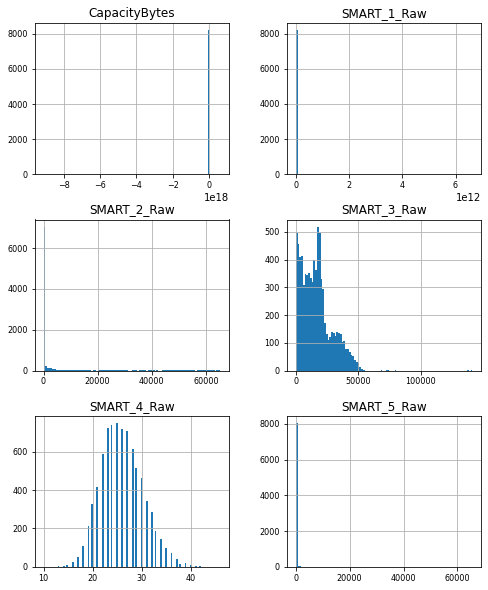

In [8]:
df.hist(figsize=(8, 10), bins=100, xlabelsize=8, ylabelsize=8);

In [11]:
df['CapacityBytes'].value_counts()

 3.000000e+12    3173
 4.000000e+12    2798
 1.500000e+12     961
 2.000000e+12     823
 1.000000e+12     135
 6.000000e+12      94
 5.000000e+11      68
 1.600000e+11      56
 3.200000e+11      29
 2.500000e+11      29
 8.002636e+10      24
 8.000000e+12       5
 6.000000e+17       2
 5.000000e+12       2
 1.070000e+17       1
 1.190000e+12       1
-9.120000e+18       1
Name: CapacityBytes, dtype: int64

In [12]:
df[df.columns[1]].value_counts()

0.0            2583
1.0              69
65536.0          49
2.0              30
65537.0          19
               ... 
185108772.0       1
42833696.0        1
17202256.0        1
137541402.0       1
208030360.0       1
Name: SMART_1_Raw, Length: 5324, dtype: int64

In [13]:
df[df.columns[5]].value_counts()

0.0       6445
8.0        244
1.0        129
16.0       127
24.0        92
          ... 
126.0        1
6293.0       1
4264.0       1
1208.0       1
188.0        1
Name: SMART_5_Raw, Length: 297, dtype: int64

In [14]:
df.describe()

,CapacityBytes,SMART_1_Raw,SMART_2_Raw,SMART_3_Raw,SMART_4_Raw,SMART_5_Raw
count,8.202000e+03,8.193000e+03,8194.000000,8194.000000,8194.000000,8194.000000
mean,-9.495720e+14,8.886273e+08,1627.711130,16702.866244,25.993654,212.670735
std,1.011448e+17,7.324664e+10,7805.379814,12182.257648,4.291065,3040.166391
min,-9.120000e+18,0.000000e+00,0.000000,6.000000,10.000000,0.000000
25%,2.000000e+12,0.000000e+00,0.000000,6874.250000,23.000000,0.000000
50%,3.000000e+12,4.297987e+07,0.000000,15349.500000,26.000000,0.000000
75%,4.000000e+12,1.444650e+08,0.000000,22414.750000,29.000000,0.000000
max,6.000000e+17,6.630000e+12,65224.000000,141415.000000,46.000000,65534.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8202 entries, 0 to 8201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CapacityBytes  8202 non-null   float64 
 1   SMART_1_Raw    8193 non-null   float64 
 2   SMART_2_Raw    8194 non-null   float64 
 3   SMART_3_Raw    8194 non-null   float64 
 4   SMART_4_Raw    8194 non-null   float64 
 5   SMART_5_Raw    8194 non-null   float64 
 6   DiskFailure    8202 non-null   category
dtypes: category(1), float64(6)
memory usage: 392.7 KB


In [16]:
df=df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CapacityBytes  8193 non-null   float64 
 1   SMART_1_Raw    8193 non-null   float64 
 2   SMART_2_Raw    8193 non-null   float64 
 3   SMART_3_Raw    8193 non-null   float64 
 4   SMART_4_Raw    8193 non-null   float64 
 5   SMART_5_Raw    8193 non-null   float64 
 6   DiskFailure    8193 non-null   category
dtypes: category(1), float64(6)
memory usage: 456.2 KB


In [22]:
X=df[df.columns[:6]] 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 0 to 8201
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CapacityBytes  8193 non-null   float64
 1   SMART_1_Raw    8193 non-null   float64
 2   SMART_2_Raw    8193 non-null   float64
 3   SMART_3_Raw    8193 non-null   float64
 4   SMART_4_Raw    8193 non-null   float64
 5   SMART_5_Raw    8193 non-null   float64
dtypes: float64(6)
memory usage: 448.1 KB


In [23]:
X

,CapacityBytes,SMART_1_Raw,SMART_2_Raw,SMART_3_Raw,SMART_4_Raw,SMART_5_Raw
0,2.000000e+12,0.0,1.0,39063.0,31.0,0.0
1,2.000000e+12,0.0,1.0,30730.0,32.0,0.0
2,4.000000e+12,0.0,0.0,1806.0,24.0,0.0
3,1.500000e+12,104152028.0,102.0,36008.0,26.0,0.0
4,1.500000e+12,133405108.0,1242.0,37515.0,21.0,0.0
...,...,...,...,...,...,...
8197,3.000000e+12,0.0,0.0,26353.0,27.0,0.0
8198,4.000000e+12,0.0,0.0,10489.0,23.0,0.0
8199,3.000000e+12,223688808.0,0.0,17749.0,32.0,24.0
8200,4.000000e+12,152129792.0,0.0,16836.0,25.0,64.0


In [27]:
X1=preprocessing.normalize(X)
X=X1

In [25]:
#X2=pd.DataFrame(X)
#X2

,CapacityBytes,SMART_1_Raw,SMART_2_Raw,SMART_3_Raw,SMART_4_Raw,SMART_5_Raw
0,2.000000e+12,0.0,1.0,39063.0,31.0,0.0
1,2.000000e+12,0.0,1.0,30730.0,32.0,0.0
2,4.000000e+12,0.0,0.0,1806.0,24.0,0.0
3,1.500000e+12,104152028.0,102.0,36008.0,26.0,0.0
4,1.500000e+12,133405108.0,1242.0,37515.0,21.0,0.0
...,...,...,...,...,...,...
8197,3.000000e+12,0.0,0.0,26353.0,27.0,0.0
8198,4.000000e+12,0.0,0.0,10489.0,23.0,0.0
8199,3.000000e+12,223688808.0,0.0,17749.0,32.0,24.0
8200,4.000000e+12,152129792.0,0.0,16836.0,25.0,64.0


In [26]:
Y=df['DiskFailure']
Y

0       Yes
1       Yes
2        No
3       Yes
4       Yes
       ... 
8197     No
8198    Yes
8199    Yes
8200    Yes
8201    Yes
Name: DiskFailure, Length: 8193, dtype: category
Categories (2, object): ['No', 'Yes']

In [28]:
df['DiskFailure'].describe()

count     8193
unique       2
top         No
freq      4102
Name: DiskFailure, dtype: object

<AxesSubplot:>

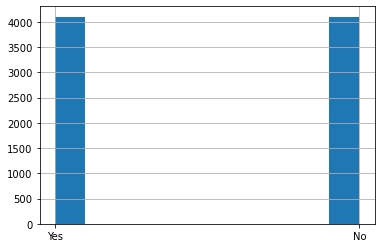

In [29]:
df['DiskFailure'].hist() #rozkład klas w zbiorze

Zbiór jest zrównoważony

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, shuffle=True)

In [67]:
print(np.array(X_train).ndim," ",np.shape(X))

2   (8193, 6)


In [68]:
X_test

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.02366667e-09,
        9.00000000e-12, 0.00000000e+00],
       [9.99999998e-01, 6.02176979e-05, 0.00000000e+00, 6.92249999e-10,
        4.24999999e-12, 0.00000000e+00],
       [9.99999990e-01, 1.41623431e-04, 0.00000000e+00, 2.62959997e-08,
        1.26666665e-11, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.20016000e-05, 0.00000000e+00, 4.37500000e-09,
        4.50000000e-12, 1.00000000e-11],
       [1.00000000e+00, 2.80590420e-05, 0.00000000e+00, 1.58150000e-09,
        6.50000000e-12, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.19000000e-10,
        7.25000000e-12, 0.00000000e+00]])

In [69]:
X_train

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.58225000e-09,
        6.75000000e-12, 0.00000000e+00],
       [9.99999995e-01, 9.50346969e-05, 1.33333333e-10, 2.67313332e-08,
        1.99999999e-11, 1.33333333e-12],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.12766667e-09,
        9.00000000e-12, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.31690700e-05, 2.65200000e-09, 3.25986667e-08,
        1.73333333e-11, 0.00000000e+00],
       [9.99999987e-01, 1.59033521e-04, 1.88199998e-09, 1.91213331e-08,
        1.53333331e-11, 1.33333332e-12],
       [1.00000000e+00, 3.08165473e-05, 0.00000000e+00, 2.82106667e-08,
        2.33333333e-11, 0.00000000e+00]])

In [70]:
y_train.shape

(6554,)

In [71]:
y_test.shape

(1639,)

In [72]:
def modelResults (observed, predicted):
    print('Accuracy:', metrics.accuracy_score(observed, predicted))  
    print('Precision:', metrics.precision_score(observed, predicted,pos_label='Yes'))
    print('Recall:', metrics.recall_score(observed, predicted,pos_label='Yes'))
    print('F1-score:', metrics.f1_score(observed,predicted,pos_label='Yes'))
def confusionMatrix(observed,predicted):
    cm = metrics.confusion_matrix(observed,predicted)/observed.shape[0]
    metrics.confusion_matrix(observed,predicted)
    df_cm = pd.DataFrame(cm, index=["Actual True", "Actual False"], columns = ["Pred True", "Pred False"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

In [73]:
logr_clf = linear_model.LogisticRegression(tol=1e-12,max_iter=5000)#tolerancja i max iter

In [74]:
logr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000, tol=1e-12)

Accuracy: 0.4960341671751068
Precision: 0.4960341671751068
Recall: 1.0
F1-score: 0.6631321370309952


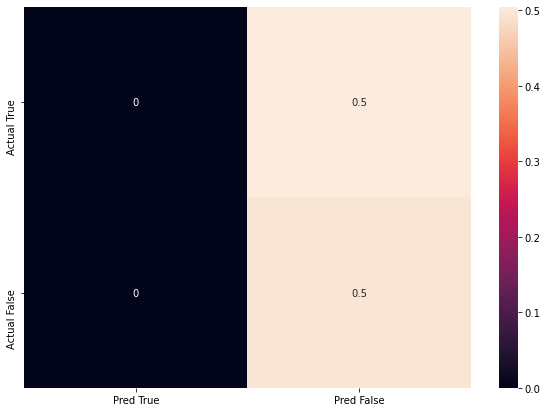

In [75]:
y_pred = logr_clf.predict(X_test)
modelResults(y_test, y_pred)
confusionMatrix(y_test, y_pred)

In [76]:
metrics.confusion_matrix(y_test, y_pred)

array([[  0, 826],
       [  0, 813]], dtype=int64)

In [77]:
cm1=metrics.confusion_matrix(y_test, y_pred)

In [78]:
cm2=cm1/cm1.sum()

In [79]:
cm2

array([[0.        , 0.50396583],
       [0.        , 0.49603417]])

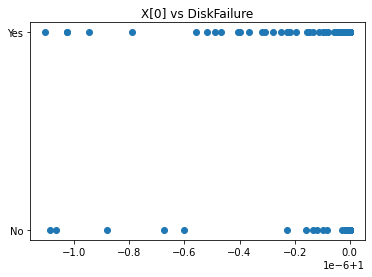

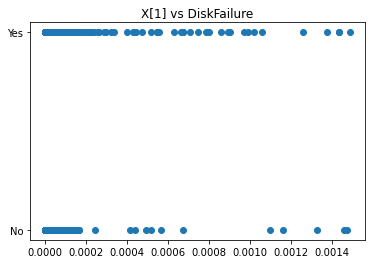

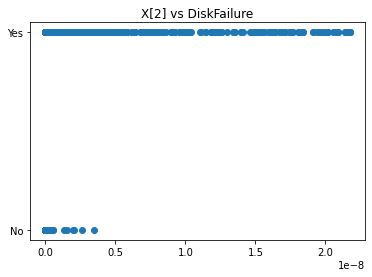

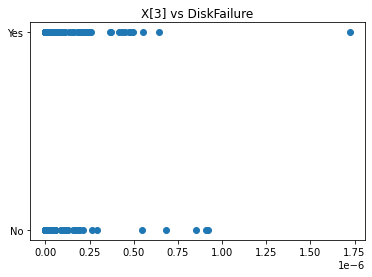

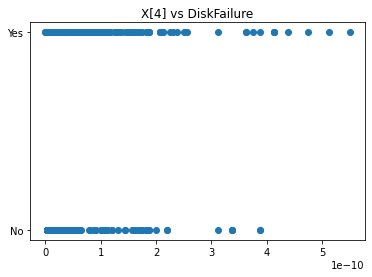

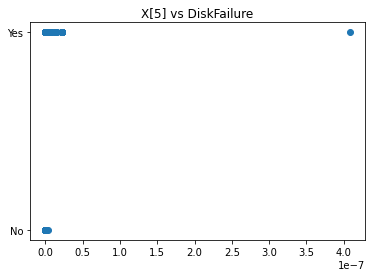

In [80]:
for col in range(0,X.shape[1]):
    plt.figure()
    plt.title("X["+str(col) + "] vs DiskFailure")
    plt.scatter(X_train[:,col], y_train)

brak liniowej korelacji

In [37]:
#from sklearn.feature_selection import SelectKBest, f_classif
#select_k_best_classifier = SelectKBest(score_func=f_classif, k=5).fit_transform(features_dataframe, targeted_class)

In [38]:
# Xpd = pd.DataFrame(X, columns = ['CapacityBytes','SMART_1_Raw','SMART_2_Raw','SMART_3_Raw','SMART_4_Raw','SMART_5_Raw'])

In [81]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=5)

In [82]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn_clf.predict(X_test)

Accuracy: 0.6741915802318487
Precision: 0.6654804270462633
Recall: 0.6900369003690037
F1-score: 0.677536231884058


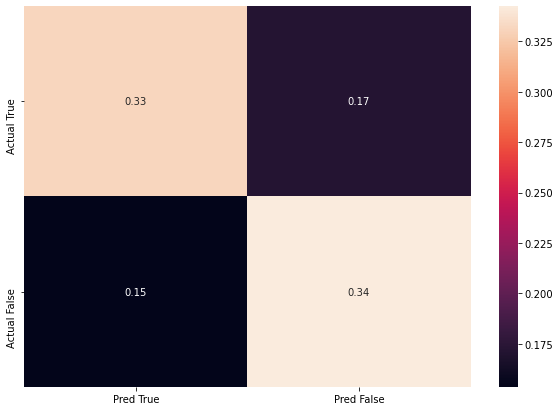

In [84]:
modelResults(y_test,y_pred)
confusionMatrix(y_test,y_pred)

In [85]:
tree_clf = tree.DecisionTreeClassifier(random_state=0) #random_state - w celu zapewnienia reprodukowalności wyników

In [86]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
tree_clf.score(X_test, y_test) #score -> accurancy

0.6723611958511287

Accuracy: 0.6723611958511287
Precision: 0.658256880733945
Recall: 0.7060270602706027
F1-score: 0.6813056379821959


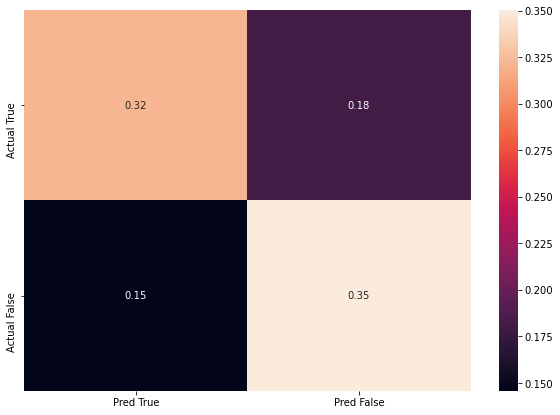

In [88]:
y_pred = tree_clf.predict(X_test)
modelResults(y_test,y_pred)

confusionMatrix(y_test,y_pred)

In [89]:
forest_clf = ensemble.RandomForestClassifier(random_state=0)

In [90]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [91]:
y_pred = forest_clf.predict(X_test)


Accuracy: 0.699816961561928
Precision: 0.6680628272251309
Recall: 0.7847478474784748
F1-score: 0.7217194570135747


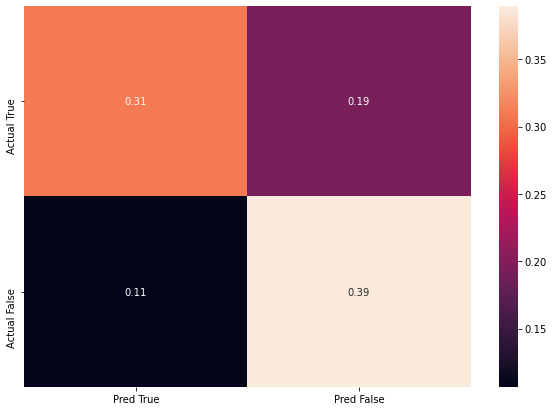

In [92]:
modelResults(y_test,y_pred)
confusionMatrix(y_test,y_pred)

Zdecydowanie wyższą wartość accuracy, recall i F1, 
nieznacze obniżenie wartości precision.

In [93]:
nn_clf = neural_network.MLPClassifier(max_iter=20000, 
                                      hidden_layer_sizes=(200,128,64,32,16,8),
                                      epsilon=1e-6, 
                                      learning_rate_init=0.001, 
                                      batch_size=48,
                                      learning_rate='adaptive',
                                      random_state=0,
                                      alpha=0.07)

In [94]:
min_max_scaler = preprocessing.MinMaxScaler()

nn_clf.fit(min_max_scaler.fit_transform(X_train), y_train)

MLPClassifier(alpha=0.07, batch_size=48, epsilon=1e-06,
              hidden_layer_sizes=(200, 128, 64, 32, 16, 8),
              learning_rate='adaptive', max_iter=20000, random_state=0)

Accuracy: 0.7079646017699115
Precision: 0.678814892501311
Recall: 0.7898108602806589
F1-score: 0.7301184433164128
Accuracy: 0.6687004270896888
Precision: 0.9192546583850931
Recall: 0.3640836408364084
F1-score: 0.5215859030837005


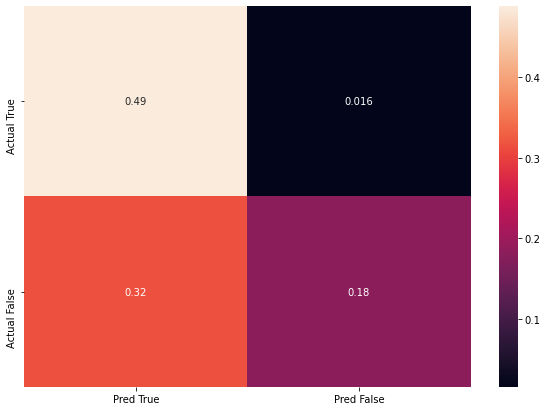

In [95]:
y_pred = nn_clf.predict(min_max_scaler.fit_transform(X_train))
modelResults(y_train,y_pred)
y_pred = nn_clf.predict(min_max_scaler.fit_transform(X_test))
modelResults(y_test,y_pred)
#metrics.confusion_matrix(y_test,y_pred)
confusionMatrix(y_test,y_pred)
#pd.options.display